## **Task 9: Библиотека Seaborn**

Итак, в предыдущих упражнениях мы иногда не брали в расчет лабораторное задание project1. В рамках него был соревновательный проект. Оно имело более длительные сроки сдачи и гораздо больше коммитов, чем обычное лабораторное задание. Давайте проанализируем динамику коммитов в этом проекте на одного пользователя. На этот раз мы будем использовать другую библиотеку для визуализации данных в Python — Seaborn. Эта библиотека упрощает создание стильных графиков.

<i>https://pyprog.pro/sns/sns_guide.html</i>

1. Анализируйте только пользователей, а не администраторов.
2. Учитывайте только записи из таблицы `checker` со статусом `ready`.
3. Выбирайте цветовую палитру по своему усмотрению.
4. Ширина линии — 3.
5. Фон графика — серый.
6. Высота — 10, а ширина — 1,5х по отношению к высоте.
7. Размер шрифта заголовка — 30.
8. Размер шрифта меток осей — 15.
9. В конце Jupyter Notebook создайте ячейку с разметкой и вставьте вопросы (ответьте на них, глядя только на графики):
    - «Какой пользователь имел самое большое количество коммитов на протяжении почти всего времени?». Ответ: `user_*`.
    - «Какой пользователь был лидером по количеству коммитов, но в течение очень ограниченного периода времени?». Ответ: `user_*`.

In [6]:
import pandas as pd
import seaborn as sns
from sqlite3 import connect
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [14]:
#path = 'C:/Users/ipinguin/Documents/Edu/School21/ds-11/'
#file = 'data/checking-logs.sqlite'

#con = connect(path+file)

In [10]:
checker = pd.read_sql('SELECT * FROM checker', con)
checker

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [11]:
sql = '''
  Select  uid, 
          strftime("%Y-%m-%d", timestamp) AS date,
          numTrials
  FROM checker 
  WHERE uid LIKE "user_%"
    and labname = "project1"
    and status = "ready" 
'''
num_commits = pd.read_sql(sql, con).sort_values(['date', 'uid'])
num_commits

,uid,date,numTrials
0,user_4,2020-04-17,1
1,user_4,2020-04-17,2
2,user_4,2020-04-17,3
3,user_4,2020-04-17,4
4,user_4,2020-04-17,5
...,...,...,...
946,user_19,2020-05-15,26
947,user_19,2020-05-15,27
948,user_19,2020-05-15,28
950,user_19,2020-05-15,29


In [12]:
sns.set_theme()

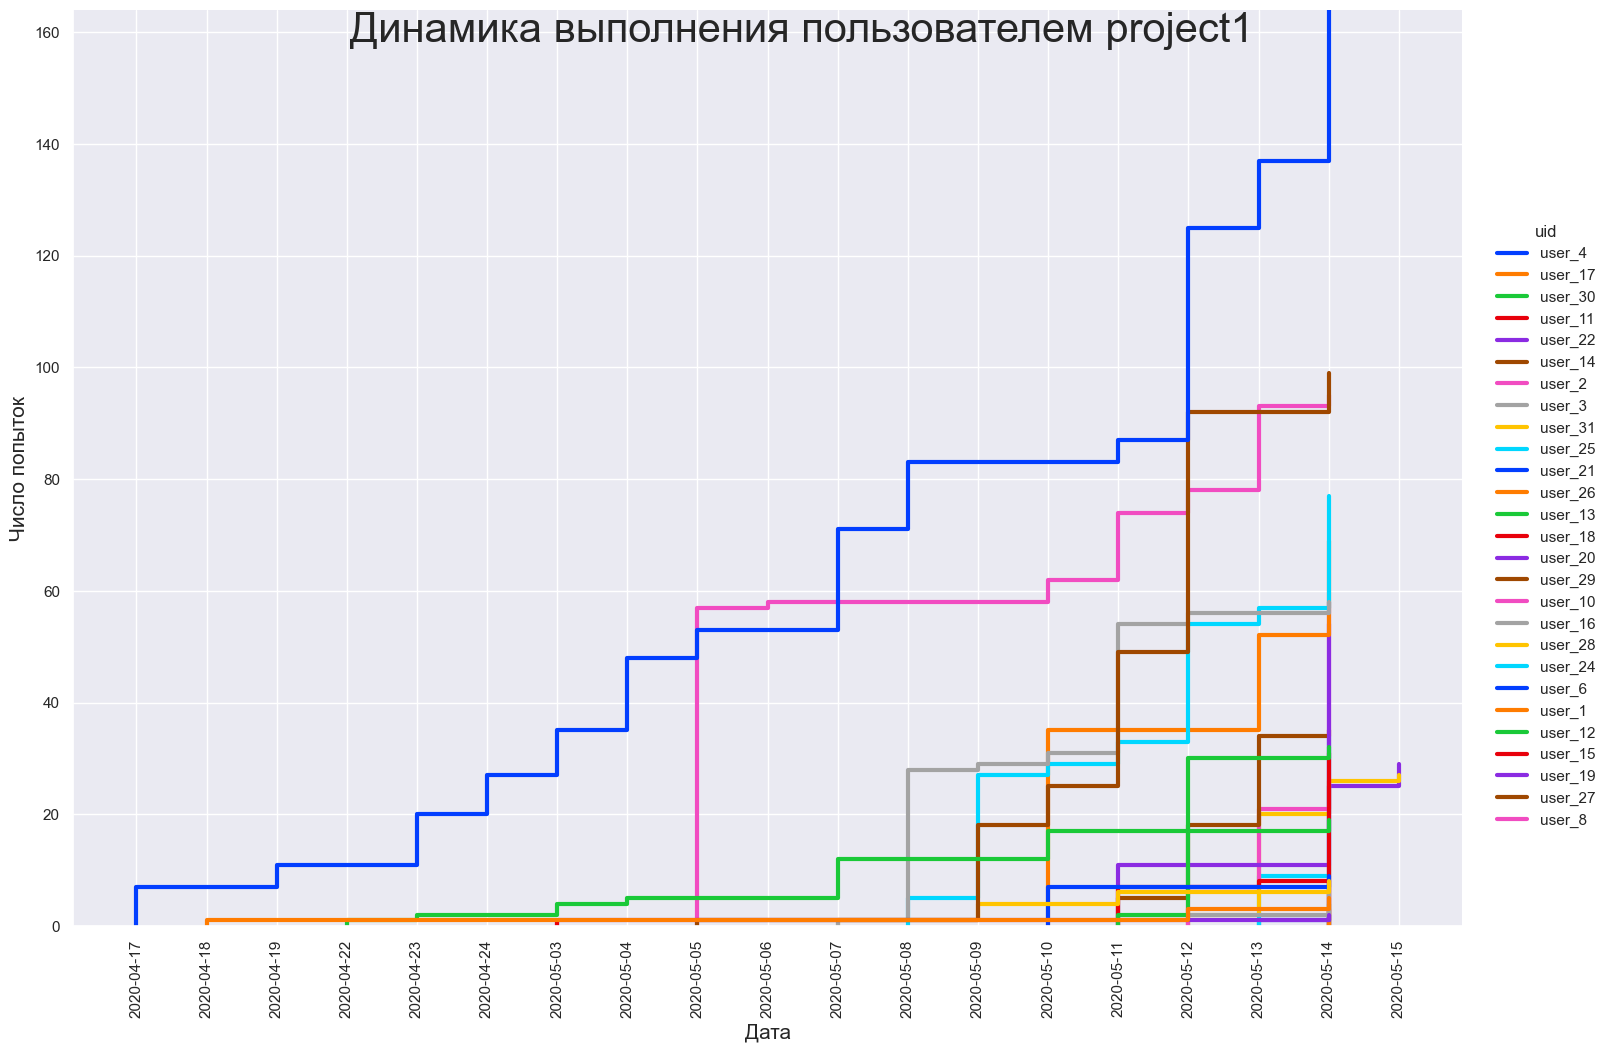

In [13]:
sns.displot(
    data=num_commits,
    kind="ecdf",
    x='date',
    stat='count',
    hue='uid',
    height=10,
    aspect=1.5,
    linewidth=3,
    palette = 'bright'
    )

plt.suptitle('Динамика выполнения пользователем project1', size=30)
plt.xlabel('Дата', size=15)
plt.ylabel('Число попыток', size=15)
plt.xticks(rotation=90)
plt.show()

Какой пользователь имел самое большое количество коммитов на протяжении почти всего времени?.

Ответ: user_4

Какой пользователь был лидером по количеству коммитов, но в течение очень ограниченного периода времени?

Ответ: user_2